# Econometrics Lab Assignment
## Time series forecast
### 20BDA13 - Jadeja Jesalba M

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#import data into a pandas dataframe
df = pd.read_csv('D:\\SJC\\Semester 3\\Eco practicals\\Assignments\\21-11-21\\daily-total-female-births.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


# Data 
    - This dataset describes the number of daily female births in California in 1959.
    - 365 observations and two features
    - one object feature 
    - one date feature 

In [5]:
#first 6 records
df. head(6)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29


In [8]:
#stats for the integer column
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [9]:
#columns in the dataset
df.columns

Index(['Date', 'Births'], dtype='object')

In [11]:
#shape of the dataset
df.shape

(365, 2)

In [12]:
#check for null values
df.isna().sum()

Date      0
Births    0
dtype: int64

In [13]:
df.isnull().sum()

Date      0
Births    0
dtype: int64

- there are no null values in the dataset

In [14]:
#unique values in each column
df.nunique()

Date      365
Births     39
dtype: int64

# EDA

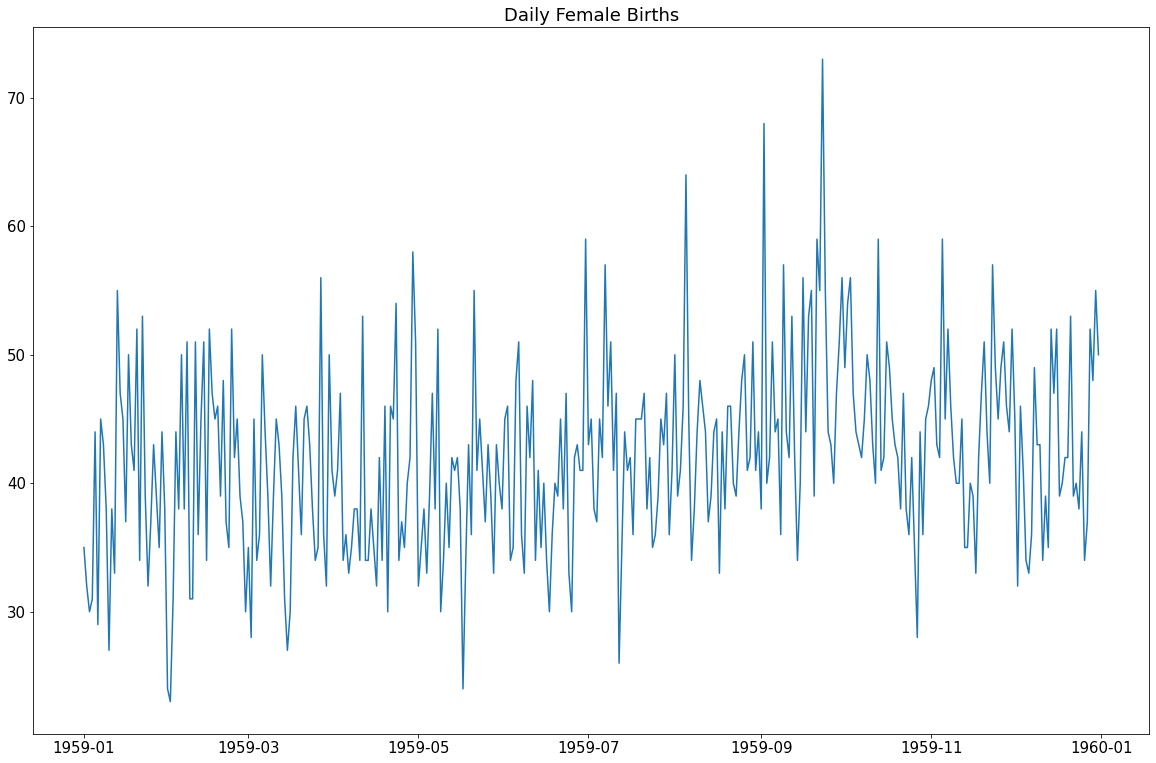

In [43]:
plt.figure(figsize = (20, 13))
plot1 = plt.plot(df['Date'], df['Births'])
plt.title('Daily Female Births', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
#converting date to datetime
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')

In [19]:
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [21]:
#extracting month and year from date column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [22]:
df

,Date,Births,year,month
0,1959-01-01,35,1959,1
1,1959-01-02,32,1959,1
2,1959-01-03,30,1959,1
3,1959-01-04,31,1959,1
4,1959-01-05,44,1959,1
...,...,...,...,...
360,1959-12-27,37,1959,12
361,1959-12-28,52,1959,12
362,1959-12-29,48,1959,12
363,1959-12-30,55,1959,12


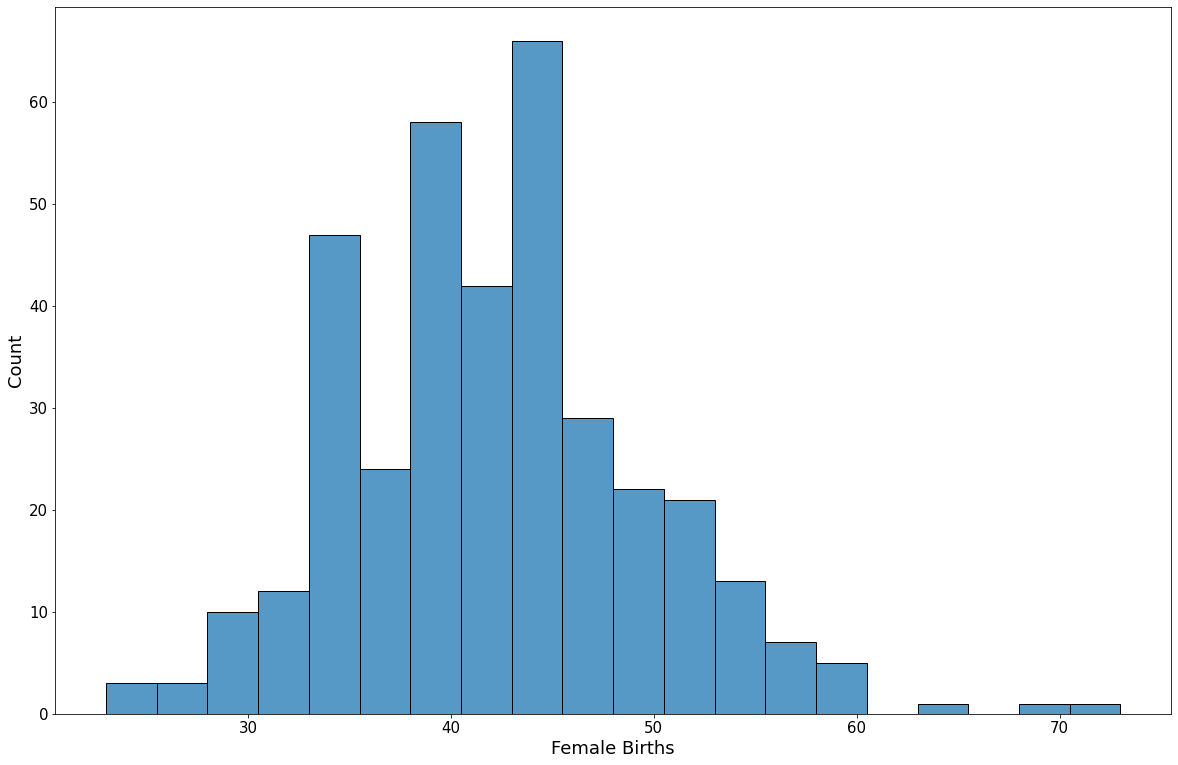

In [44]:
plt.figure(figsize = (20, 13))
plot2 = sns.histplot(df.Births)
plot2.set_xlabel('Female Births', fontsize = 18)
plot2.set_ylabel('Count', fontsize = 18)
plot2.tick_params(labelsize = 15)
plt.show()

- we can see that during september - october the number births was the highest, making it the outlier, crossing over 70 births.

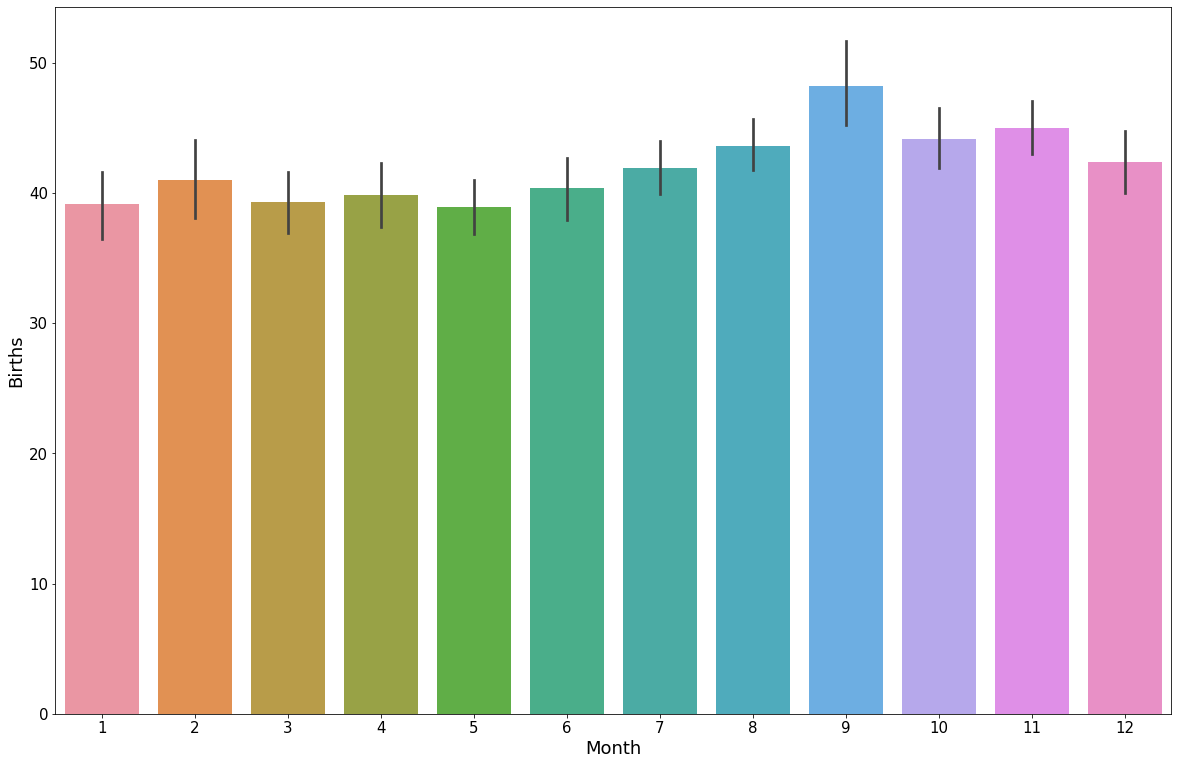

In [49]:
plt.figure(figsize = (20, 13))
plot4 = sns.barplot(x = 'month', y = 'Births', data = df)
plot4.set_xlabel('Month', fontsize = 18)
plot4.set_ylabel('Births', fontsize = 18)
plot4.tick_params(labelsize = 15)
plt.show()

- The plot shows clearly that the month September saw the maximum number of births

# References 
    - https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv